In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [55]:
df = yf.download('AAPL', start = '2019-01-01', end = '2022-09-01')

[*********************100%***********************]  1 of 1 completed


In [56]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.105133,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.309578,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.774246,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.694607,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.375057,164101200
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,169.748413,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.349014,78961000
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.112747,73314000


In [57]:
# 20-day

# moving average
df['ma_20'] = df.Close.rolling(20).mean()

# volatlity or std over the 20 days (rolling)
df['vol'] = df.Close.rolling(20).std()

# Bollinger Bands
df["upper_bb"] = df.ma_20+(2*df.vol)
df["lower_bb"] = df.ma_20-(2*df.vol)

In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-25,73.150002,74.769997,72.110001,74.629997,74.629997,8979200,81.303999,6.244311,93.792621,68.815378
2022-08-26,74.320000,74.349998,68.760002,68.870003,68.870003,13750100,80.944500,6.748711,94.441921,67.447078
2022-08-29,67.589996,69.989998,67.339996,67.750000,67.750000,9590900,80.441500,7.343333,95.128166,65.754833


<AxesSubplot:xlabel='Date'>

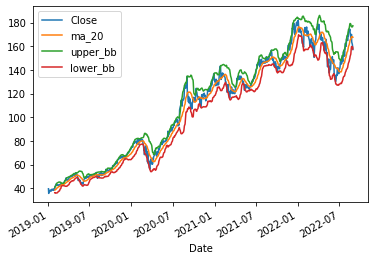

In [58]:
df[['Close', "ma_20", "upper_bb", "lower_bb"]].plot()

In [59]:
# Relative Strength Index
df["rsi"] = ta.momentum.rsi(df.Close, window = 6)

In [60]:
# These first two conditions will be the buying conditions
# The second two are the selling conditions
conditions = [(df.rsi <30) & (df.Close<df.lower_bb),
             (df.rsi>70) & (df.Close>df.upper_bb)]

In [61]:
choices = ['Buy', "Sell"]

In [62]:
df['signal'] = np.select(conditions, choices)

In [63]:
df.dropna(inplace=True)

In [64]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2019-01-30,40.812500,41.537498,40.057499,41.312500,39.873821,244439200,38.388125,1.164768,40.717661,36.058589,75.163467,Sell
2019-01-31,41.527500,42.250000,41.139999,41.610001,40.160965,162958400,38.494625,1.352161,41.198947,35.790303,76.744352,Sell
2019-02-01,41.740002,42.244999,41.482498,41.630001,40.180264,130672400,38.798750,1.338374,41.475498,36.122002,76.863160,Sell
2019-02-04,41.852501,42.915001,41.820000,42.812500,41.321583,125982000,39.086125,1.547260,42.180645,35.991605,83.018335,Sell
2019-02-05,43.215000,43.770000,43.087502,43.544998,42.028580,144406400,39.414250,1.759026,42.932301,35.896199,85.822066,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,169.748413,51218200,167.987000,4.228697,176.444395,159.529606,55.631965,0
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.349014,78961000,168.042500,4.159752,176.362005,159.722996,31.372433,0
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.112747,73314000,168.036001,4.170584,176.377168,159.694833,26.522445,0


In [65]:
# To call on open
df.signal = df.signal.shift()

In [66]:
position = False
buydates, selldates = [],[]
buyprices,sellprices = [],[]

In [67]:
for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position and row['signal'] == "Sell":
        selldates.append(index)
        sellprices.append(row.Open)
        position = False

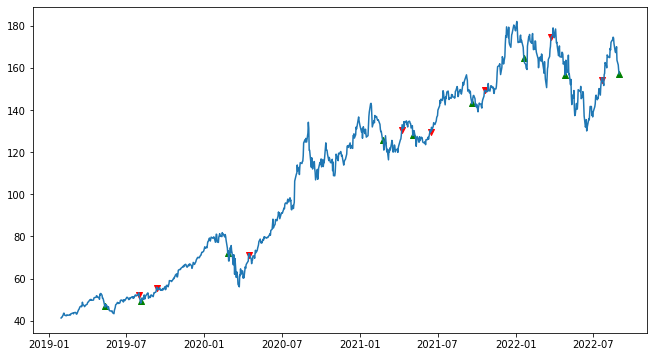

In [68]:
plt.figure(figsize=(11,6))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index,df.loc[buydates].Close, marker = '^', c = 'g')
plt.scatter(df.loc[selldates].index,df.loc[selldates].Close, marker = 'v', c = 'r')

In [69]:
## The last two trades were not ideal
[(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)]

[0.14747057397307886,
 0.14512763408628993,
 -0.061638204213747765,
 0.04193596252768938,
 0.005727596831604496,
 0.03314114163269581,
 0.04132236993545124,
 -0.003335284845402858]

In [70]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)])+1).prod()

1.385418883690347

In [71]:

(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)])+1).prod()-1

0.38541888369034694

In [ ]:
# we can deal with this using stop losses

In [72]:
df['shifted_Close'] = df.Close.shift()

In [77]:
position = False
buydates, selldates = [],[]
buyprices,sellprices = [],[]

In [78]:
for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position:
        # this is how we add a stop loss
        if row['signal'] == "Sell" or row.shifted_Close < 0.95*buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False

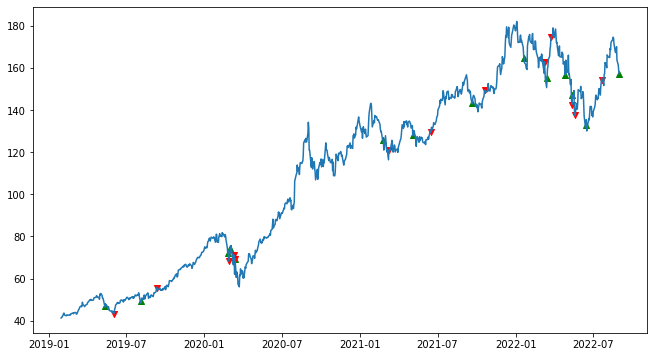

In [79]:
plt.figure(figsize=(11,6))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index,df.loc[buydates].Close, marker = '^', c = 'g')
plt.scatter(df.loc[selldates].index,df.loc[selldates].Close, marker = 'v', c = 'r')

In [80]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)])+1).prod()

1.036584852908683

In [81]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)])+1).prod()-1

0.03658485290868296